# Customer Segmentation

In [1]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = 'True', grid = False)
import warnings
warnings.filterwarnings('ignore')

In [2]:
creditcard = pd.read_csv("MArketing_data.csv")

## Data Exploration

In [3]:
creditcard

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
print('Average balance amount :', creditcard['BALANCE'].mean())
print('\nMinimun balance amount :', creditcard['BALANCE'].min())
print('\nMaximum balance amount :', creditcard['BALANCE'].max())

Average balance amount : 1564.4748276781006

Minimun balance amount : 0.0

Maximum balance amount : 19043.13856


In [6]:
creditcard.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<AxesSubplot:>

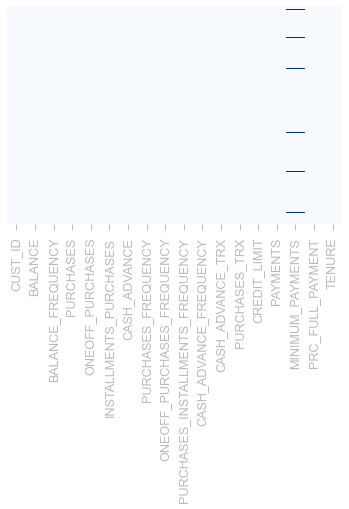

In [7]:
sns.heatmap(creditcard.isnull(), yticklabels= False, cbar = False, cmap = "Blues")

In [8]:
creditcard.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
creditcard['CREDIT_LIMIT'] = creditcard['CREDIT_LIMIT'].fillna(creditcard['CREDIT_LIMIT'].mean())

In [10]:
creditcard['MINIMUM_PAYMENTS'] = creditcard['MINIMUM_PAYMENTS'].fillna(creditcard['MINIMUM_PAYMENTS'].mean())

In [11]:
creditcard.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
creditcard.drop('CUST_ID', inplace = True, axis = 1 )

In [13]:
creditcard.shape[1]

17

In [14]:
creditcard.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


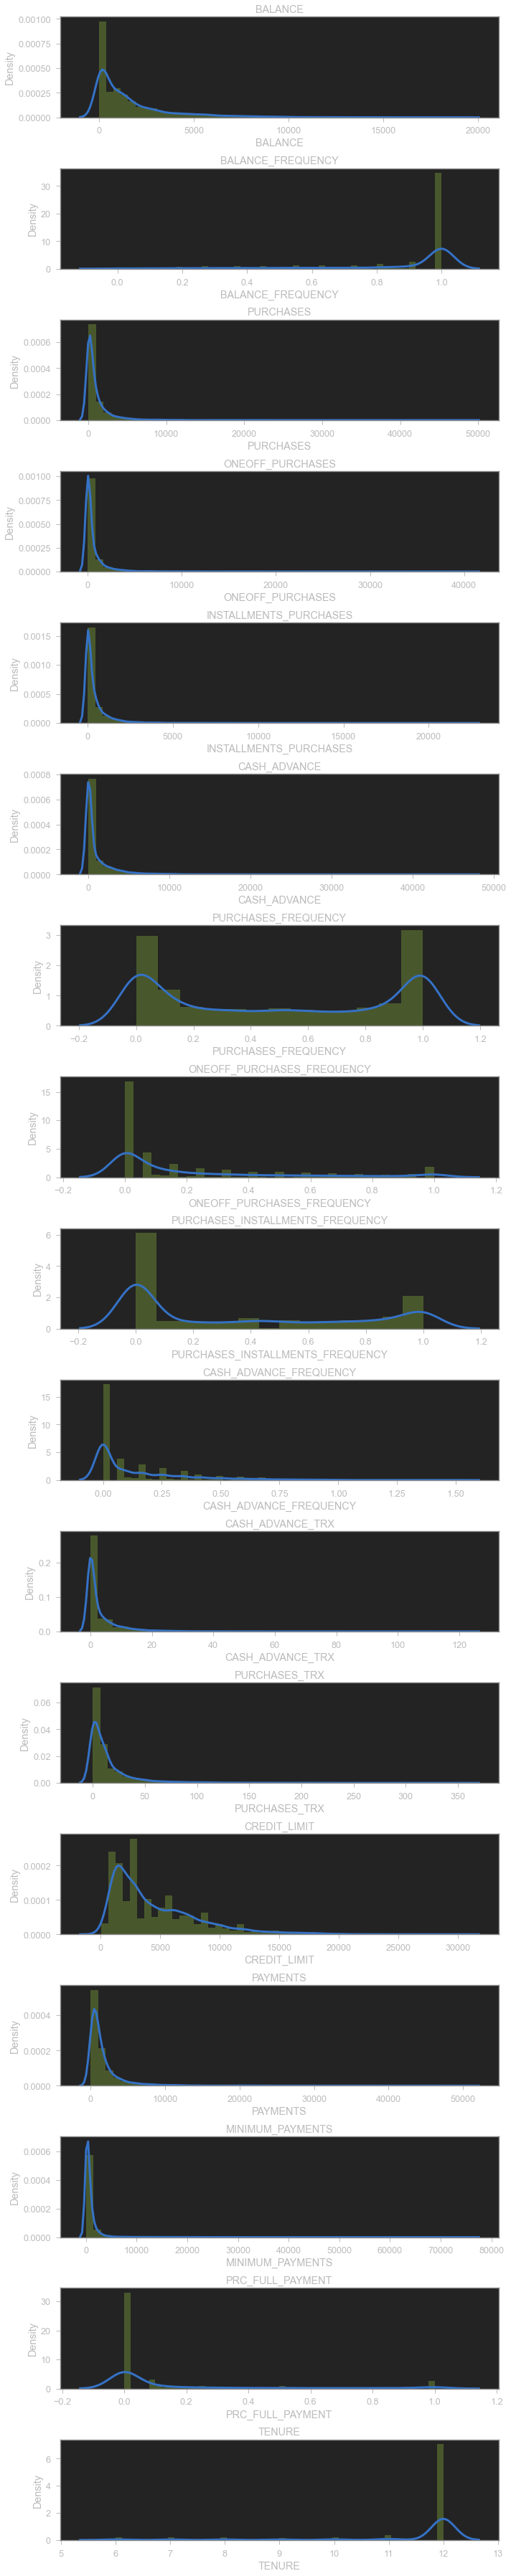

In [15]:
plt.figure(figsize = (10,50))
for i in range(len(creditcard.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(creditcard[creditcard.columns[i]], kde_kws = {'color' : 'b', 'lw':3, 'label':'KDE'}, hist_kws = {'color': 'g'})
    plt.title(creditcard.columns[i])
    plt.tight_layout()

<AxesSubplot:>

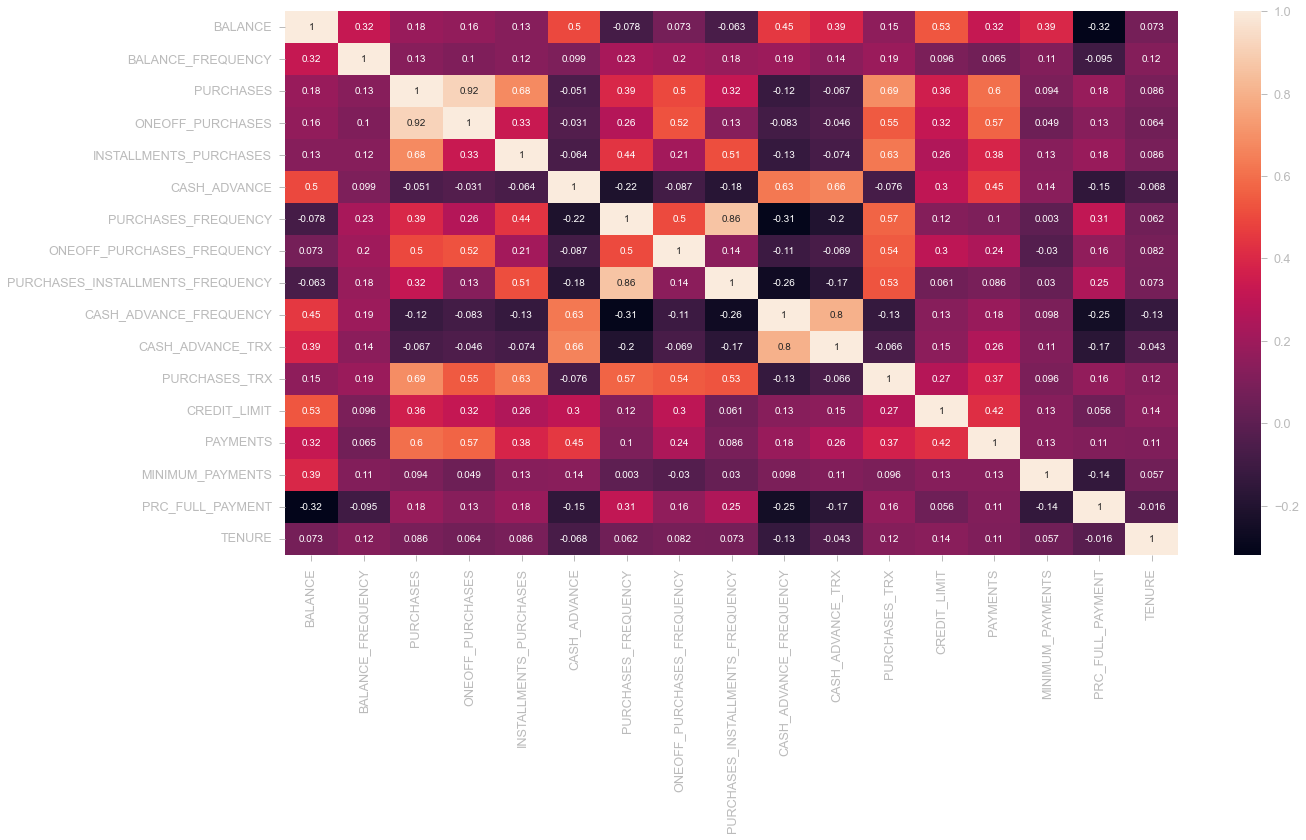

In [16]:
correlations = creditcard.corr()
f, ax = plt.subplots(figsize = (20,10))
sns.heatmap(correlations, annot = True)

## K-Means Clustering

## Finding the optimal value of clusters(k)

In [17]:
scaler = StandardScaler()
creditcard_scaled = scaler.fit_transform(creditcard)

In [18]:
creditcard_scaled.shape

(8950, 17)

In [19]:
creditcard_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

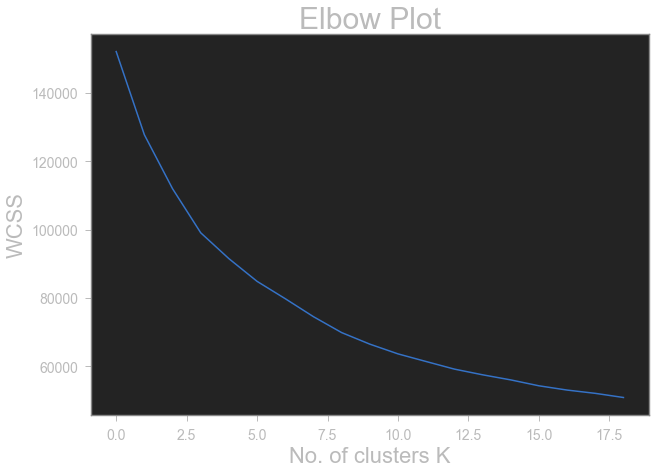

In [20]:
scores_1 = []
range_values = range(1,20)
plt.figure(figsize = (10,7))
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_scaled)
    scores_1.append(kmeans.inertia_)
    
plt.plot(scores_1, 'bx-')
plt.title("Elbow Plot", fontsize = 30)
plt.ylabel("WCSS", fontsize = 22)
plt.xlabel("No. of clusters K", fontsize = 22) 
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [22]:
kmeans = KMeans(7)
kmeans.fit(creditcard_scaled)
labels = kmeans.labels_

In [23]:
kmeans.cluster_centers_.shape

(7, 17)

In [24]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_ , columns = [creditcard.columns])

In [25]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.595999,0.375434,-0.224643,-0.157614,-0.241671,1.947552,-0.482076,-0.205397,-0.432563,1.901628,1.846363,-0.277713,0.967639,0.743508,0.483795,-0.392874,-0.092527
1,-0.010138,0.372580,-0.359127,-0.241654,-0.405086,-0.077267,-0.868365,-0.397624,-0.769981,0.143828,-0.020508,-0.488320,-0.340055,-0.265443,-0.026742,-0.454962,-0.006310
2,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409
3,1.048386,0.463156,2.456003,1.757530,2.578270,-0.157984,1.167396,1.515979,1.280758,-0.285350,-0.154415,3.069917,1.279859,1.423843,0.737754,0.234849,0.338098
4,-0.697932,-2.132592,-0.318280,-0.236682,-0.317640,-0.306031,-0.566675,-0.433950,-0.462142,-0.482294,-0.357510,-0.428083,-0.215794,-0.223743,-0.255430,0.250288,-0.165093
5,-0.393985,0.307825,-0.063972,-0.256238,0.319446,-0.360690,0.977655,-0.408619,1.170910,-0.459833,-0.355847,0.137086,-0.320919,-0.245381,-0.071178,0.353275,-0.026804
6,-0.125731,0.394354,0.526571,0.649592,0.051462,-0.328938,0.965457,1.848955,0.187791,-0.409654,-0.333696,0.606069,0.428381,0.133723,-0.157729,0.414623,0.208360


In [27]:
cluster_centers = scaler.inverse_transform(cluster_centers)

In [28]:
cluster_centers = pd.DataFrame(data = cluster_centers, columns =[creditcard.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4886.412976,0.966208,523.251112,330.830231,192.527566,5062.979491,0.296870,0.141184,0.192526,0.515679,15.848898,7.806925,8015.114948,3885.528074,1991.671242,0.038806,11.393494
1,1543.374241,0.965532,235.924877,191.340536,44.753242,816.837775,0.141834,0.083839,0.058427,0.163926,3.108874,2.572014,3257.189989,964.711947,801.884528,0.020646,11.508874
2,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667
3,3746.601659,0.986988,6250.493846,3509.576978,2742.565220,647.570772,0.958883,0.654704,0.873443,0.078043,2.195055,91.016484,9151.098901,5855.030494,2583.510159,0.222404,11.969780
4,111.787524,0.372079,323.195104,199.594303,123.829284,337.110336,0.262916,0.073002,0.180770,0.038632,0.809084,4.069284,3709.302459,1085.430383,268.937333,0.226920,11.296382
5,744.427689,0.950192,866.527366,167.134888,699.939102,222.487349,0.882731,0.080559,0.829787,0.043127,0.820431,18.117270,3326.815567,1022.791055,698.330366,0.257042,11.481448
6,1302.776133,0.970690,2128.231320,1670.627018,457.604302,289.073742,0.877835,0.754037,0.439070,0.053168,0.971596,29.774436,6053.073593,2120.258936,496.626237,0.274985,11.796157


In [29]:
labels.shape

(8950,)

In [30]:
labels.max()

6

In [31]:
labels.min()

0

In [33]:
y_kmeans = kmeans.fit_predict(creditcard_scaled)
y_kmeans

array([1, 4, 5, ..., 6, 6, 6])

In [34]:
creditcard_cluster = pd.concat([creditcard, pd.DataFrame({'cluster' : labels})], axis = 1)
creditcard_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


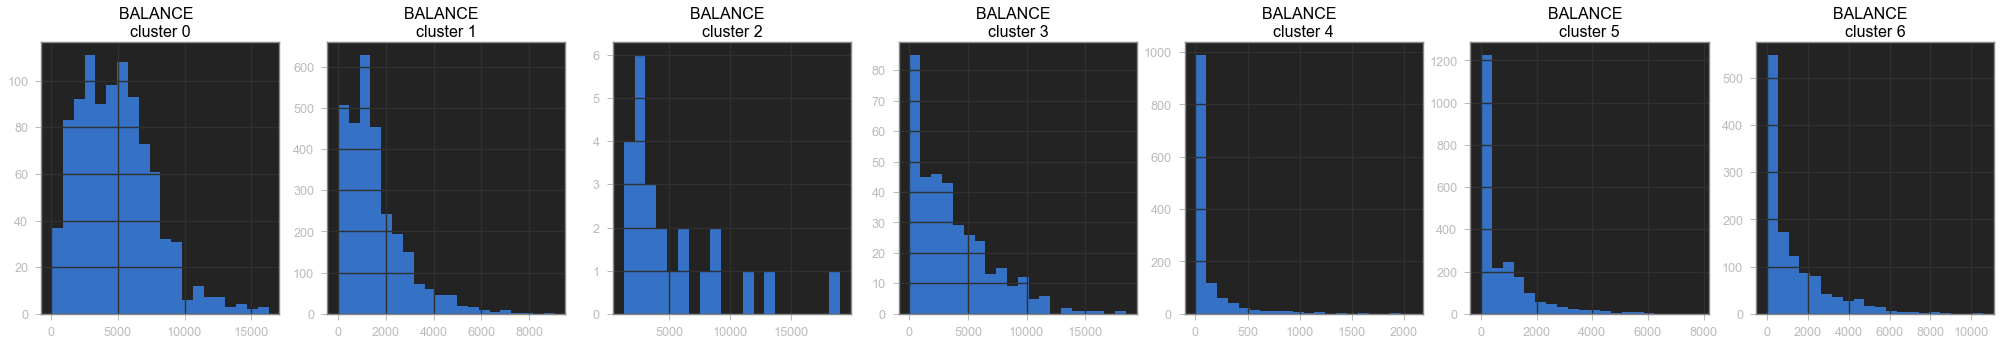

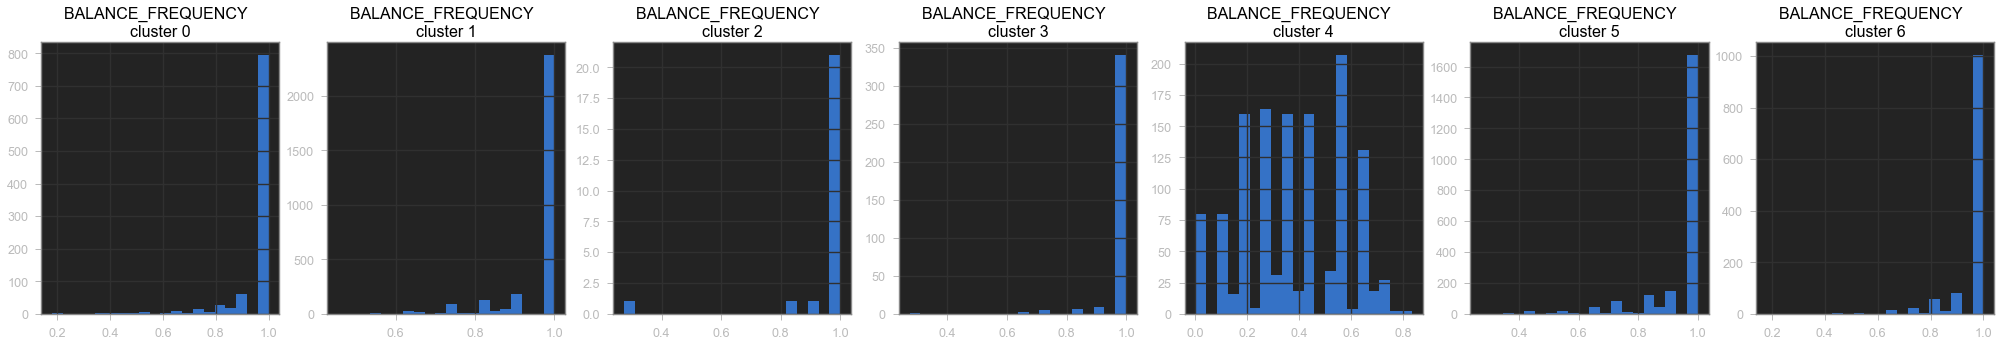

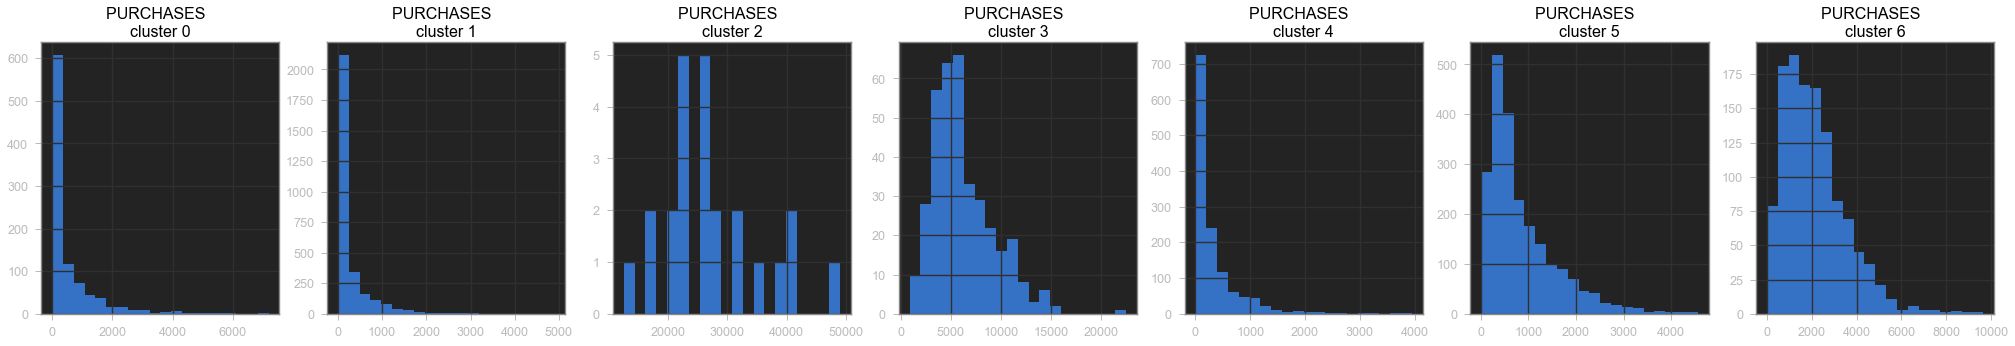

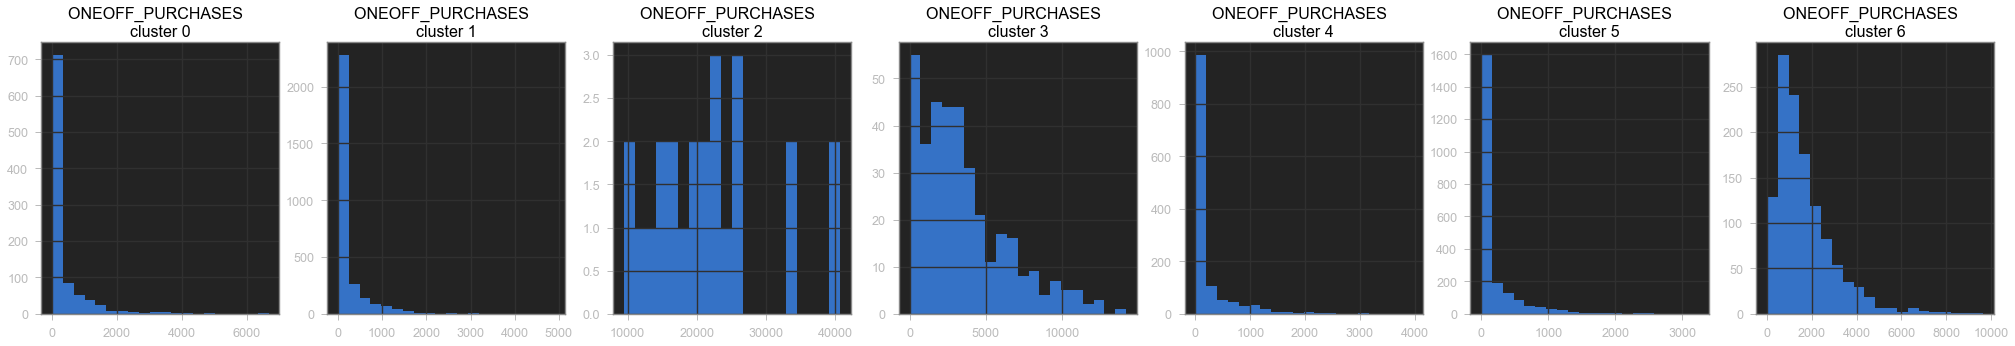

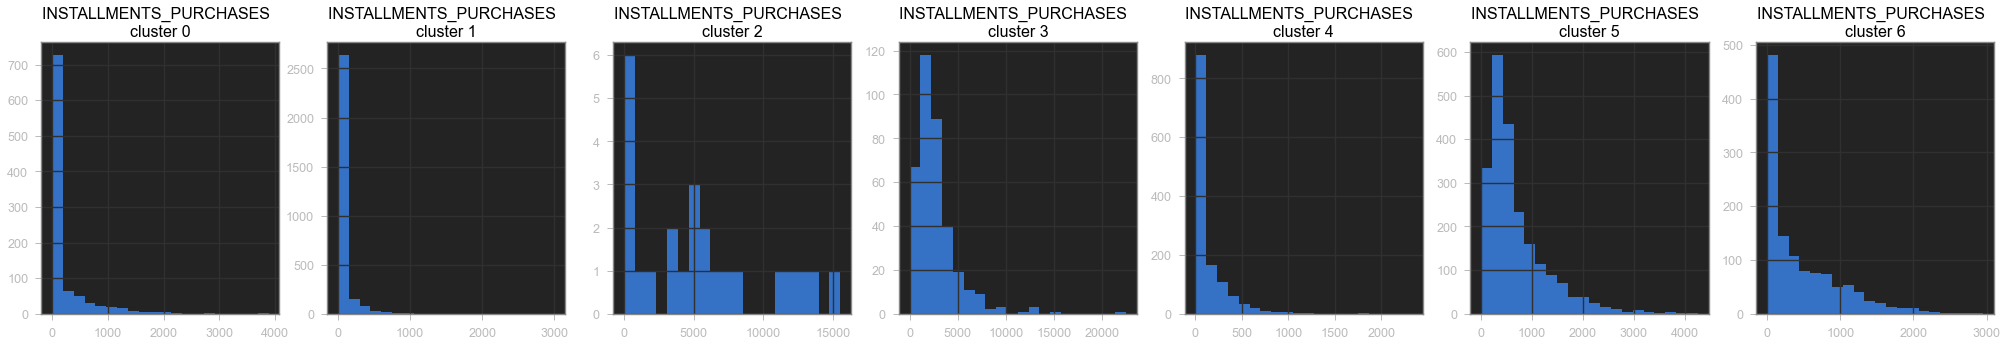

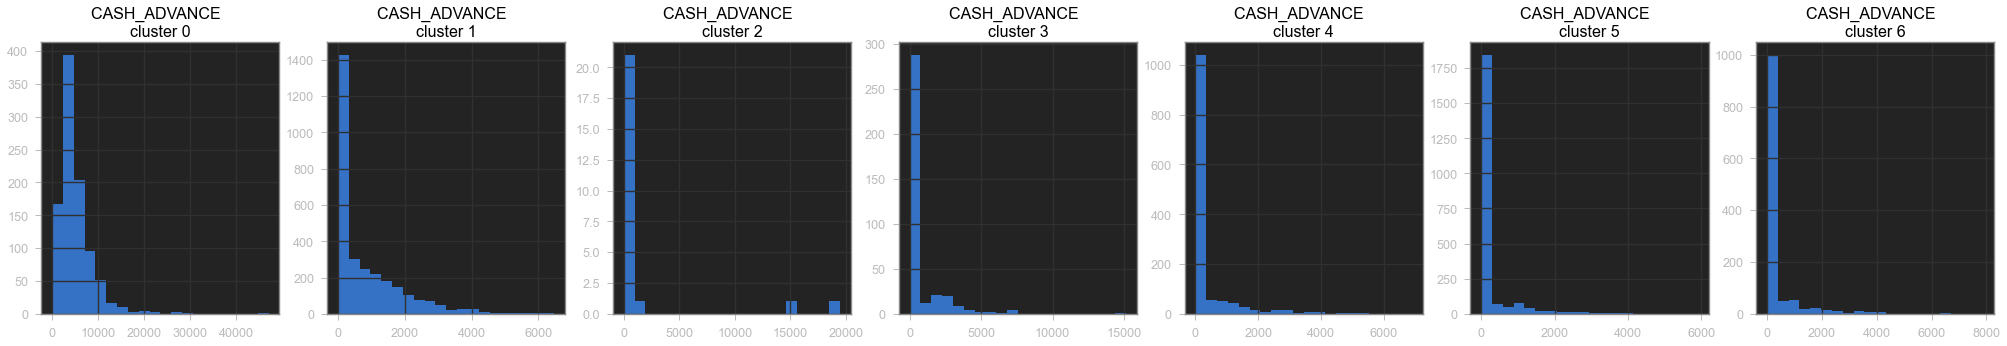

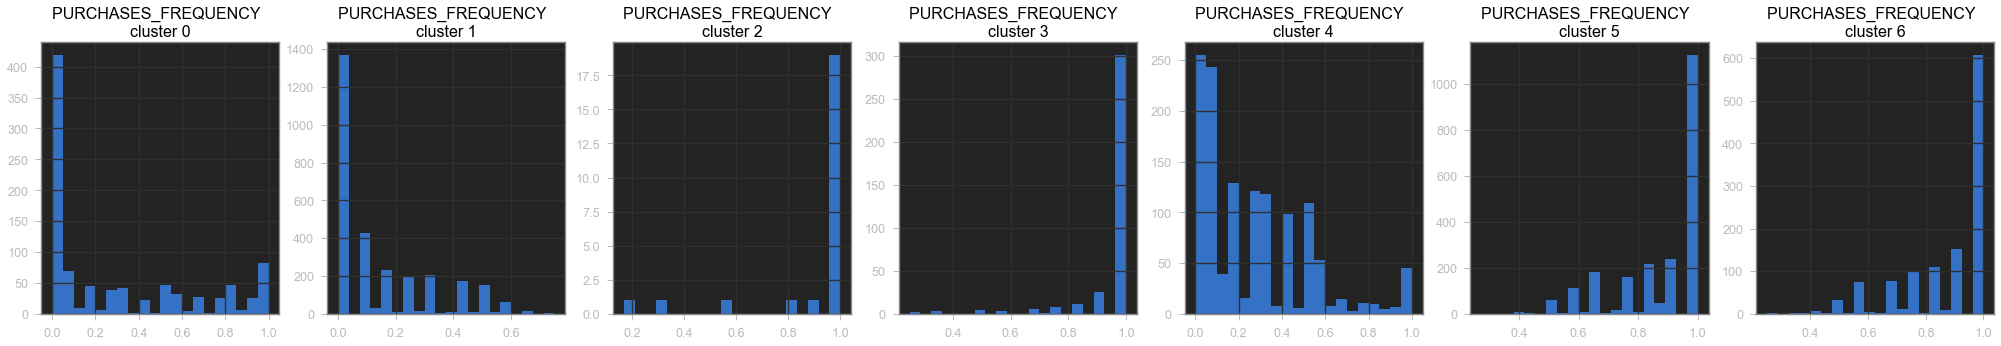

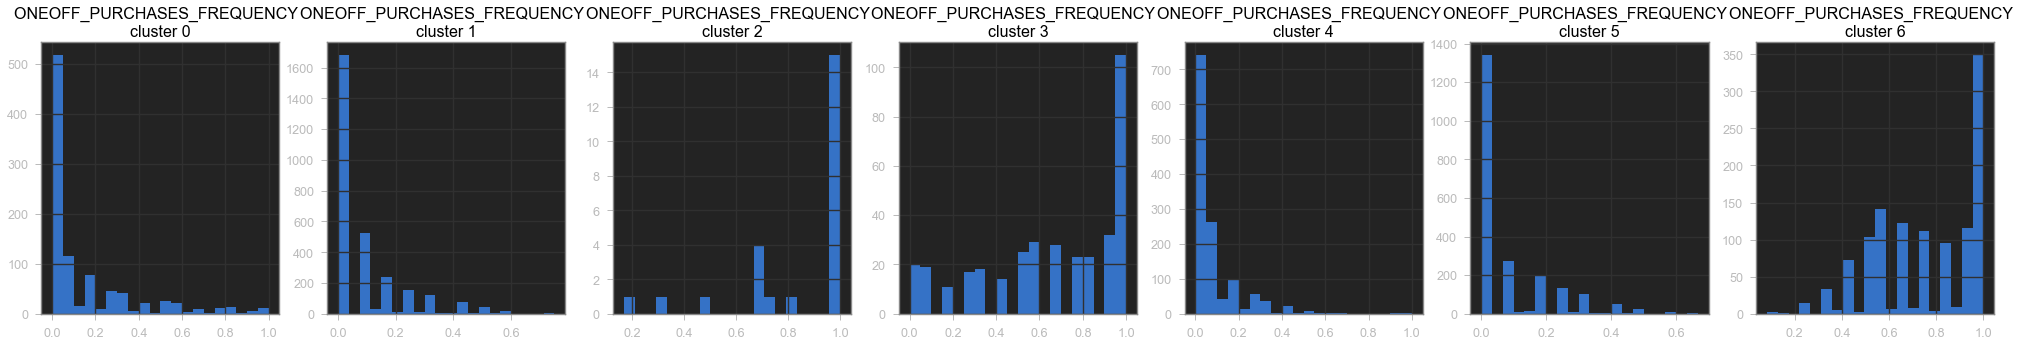

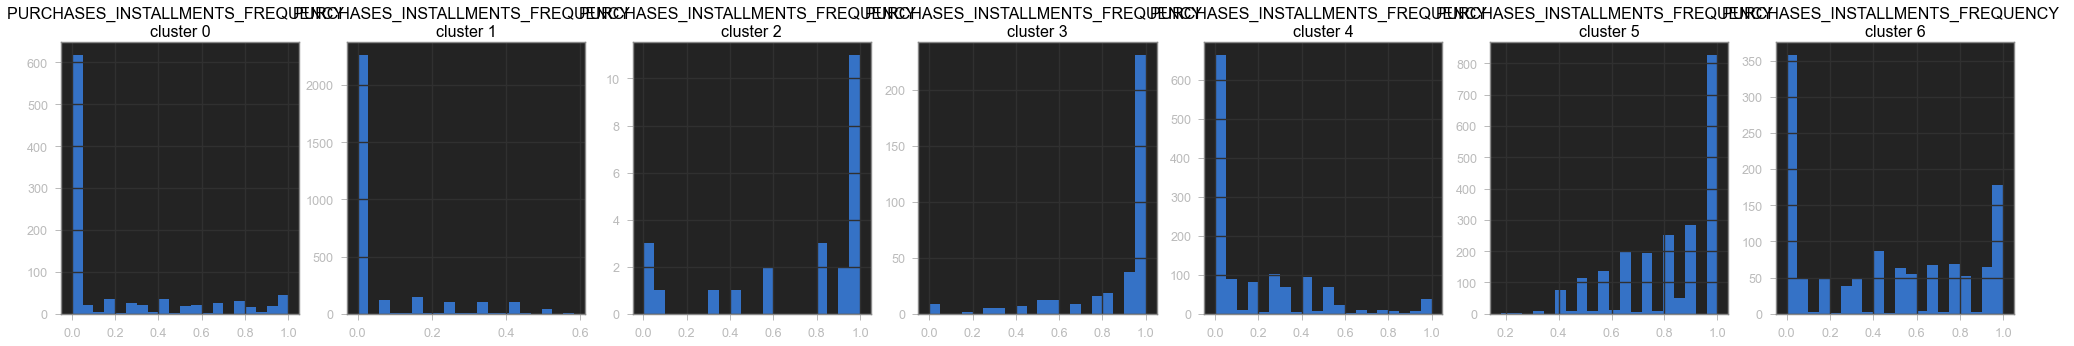

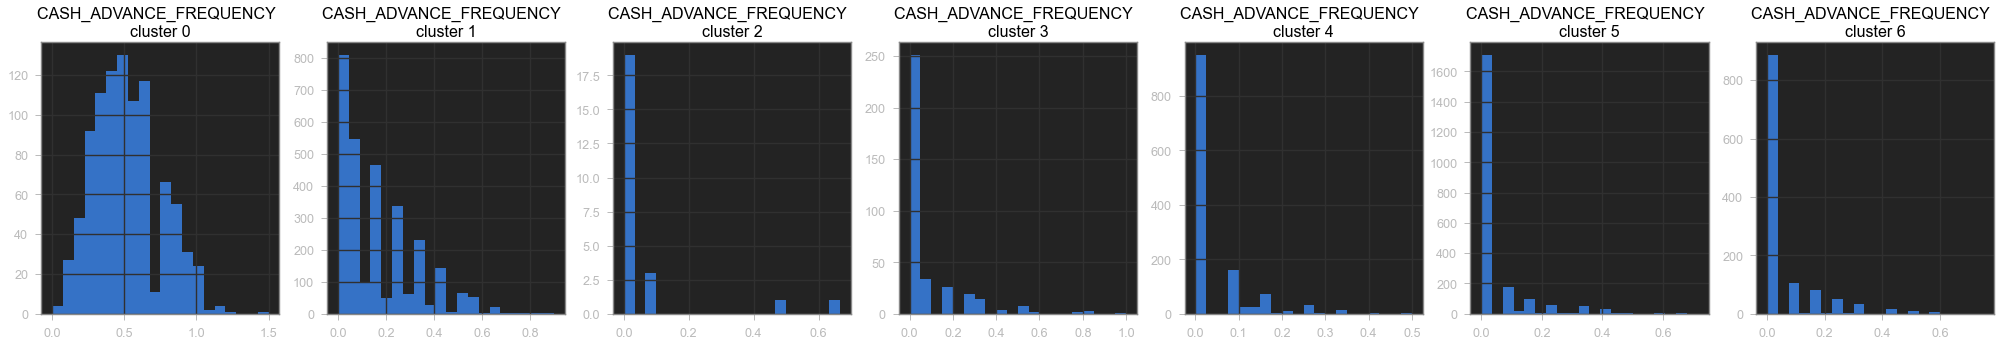

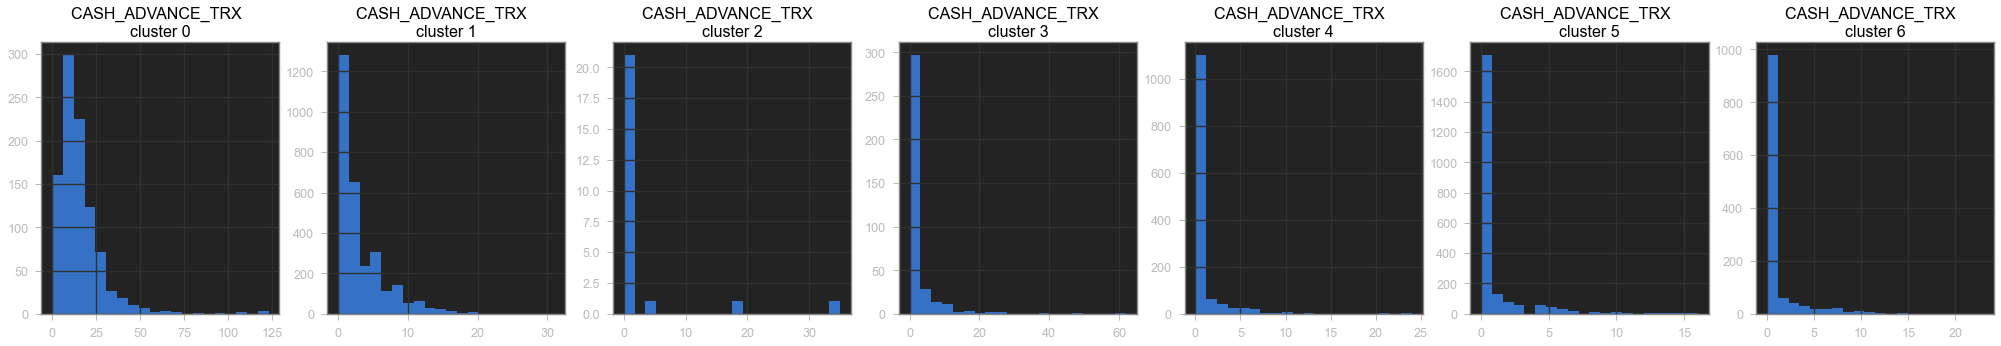

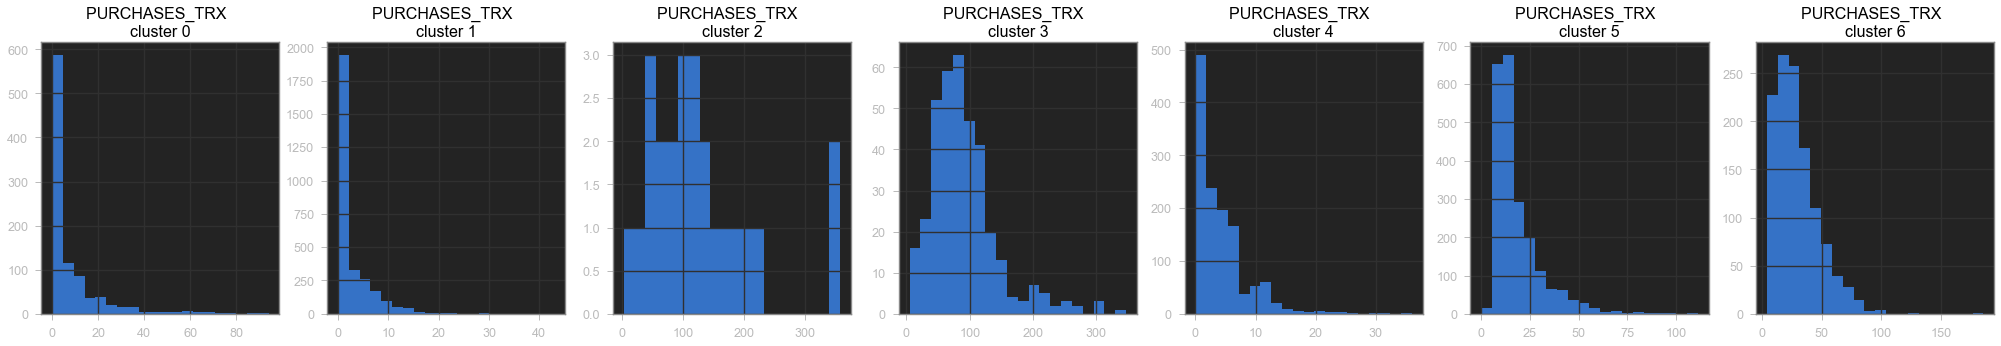

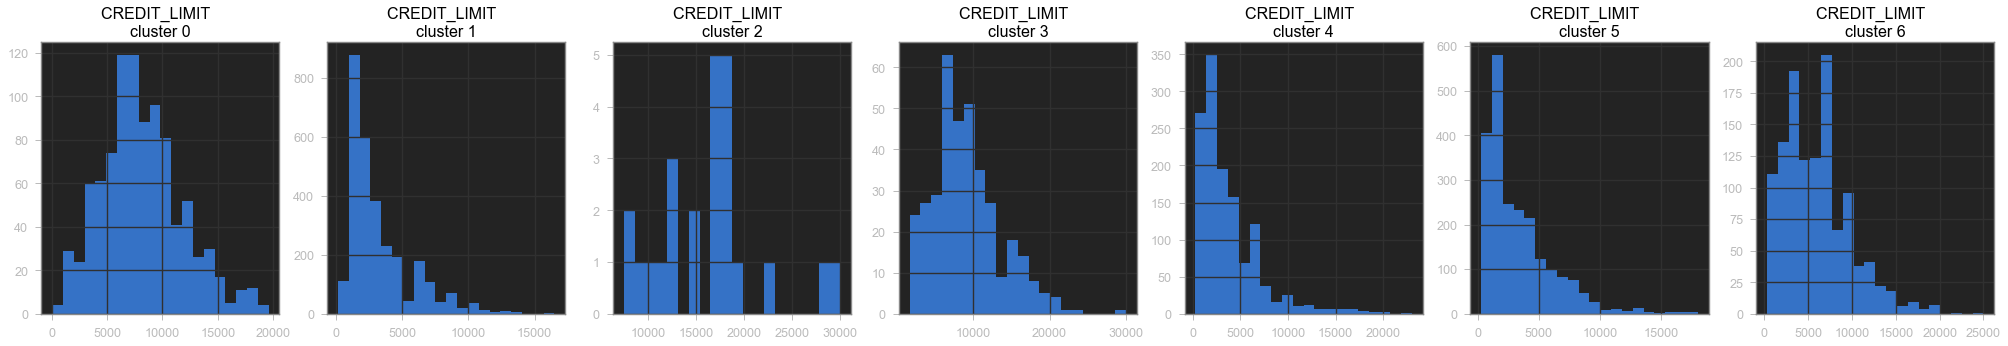

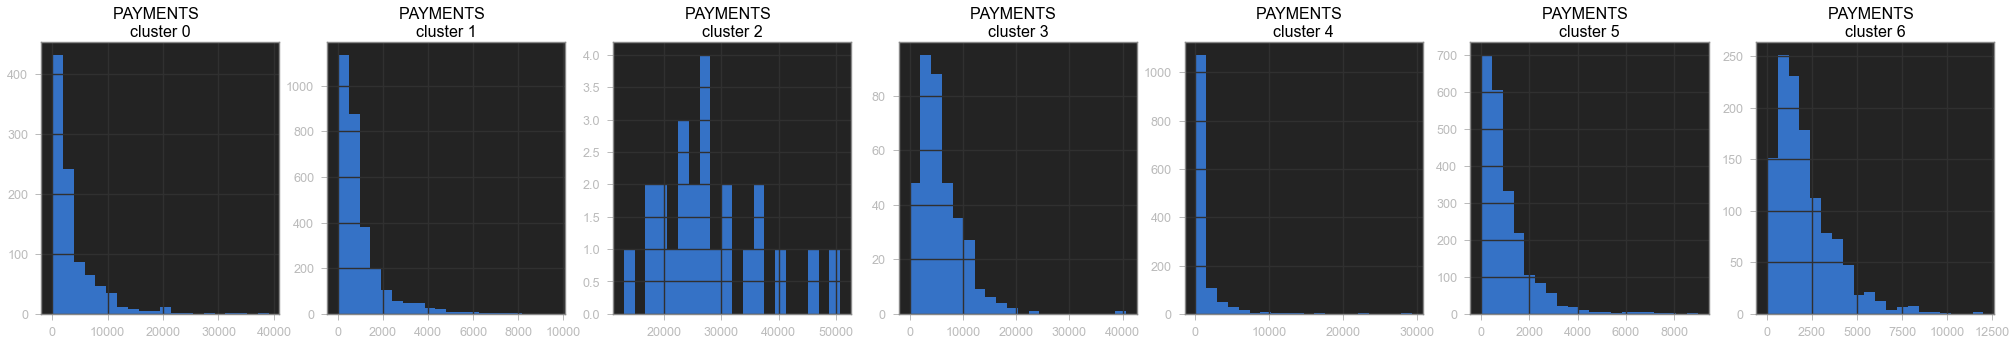

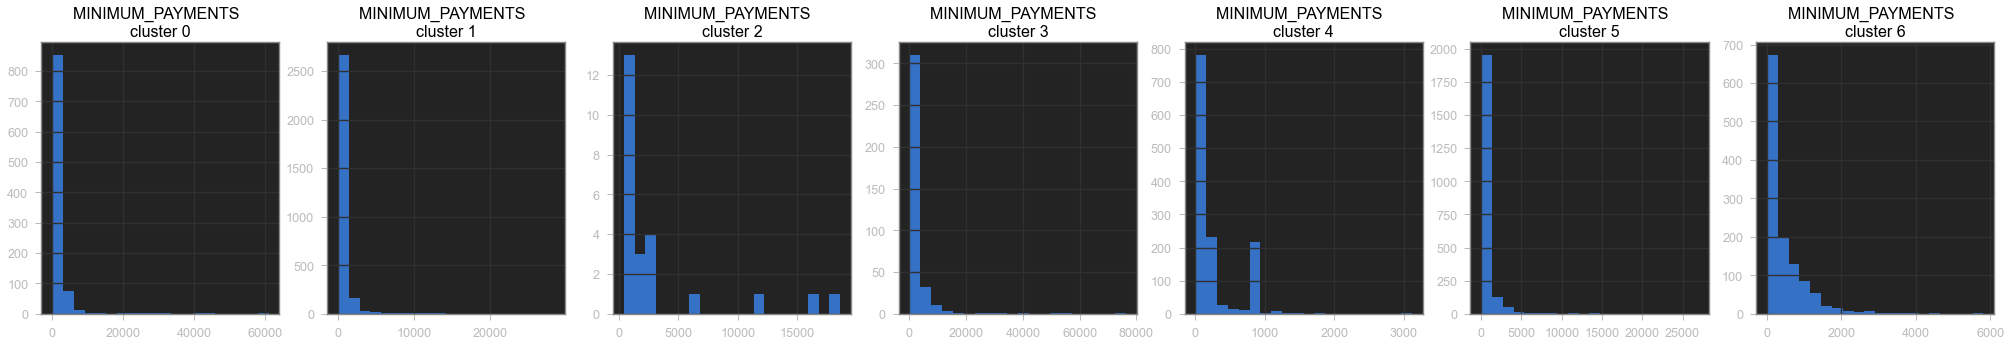

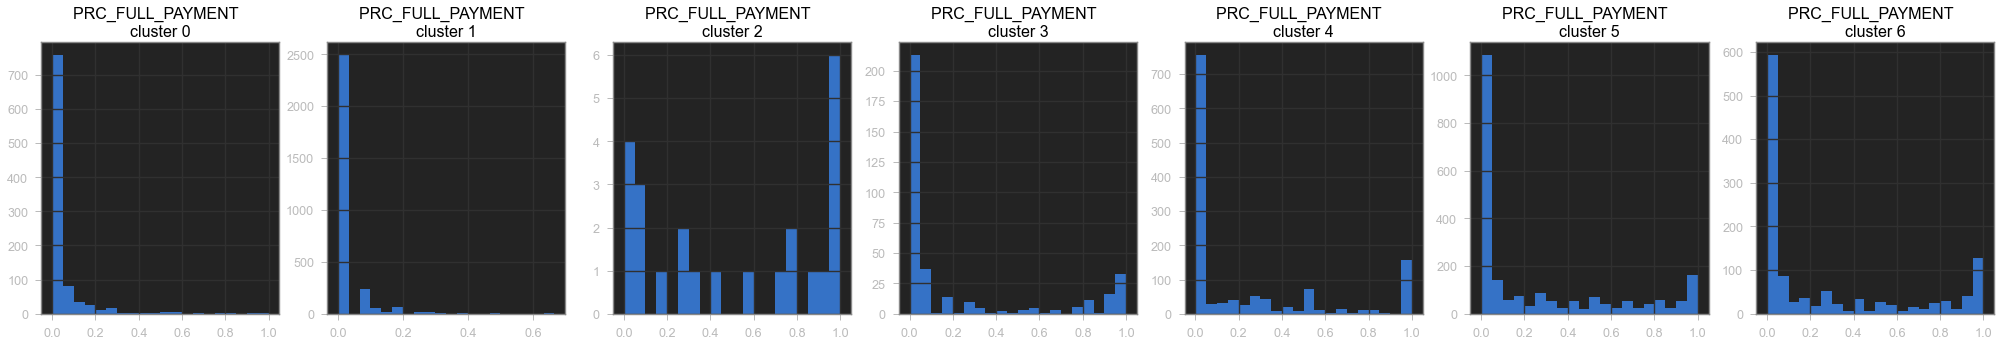

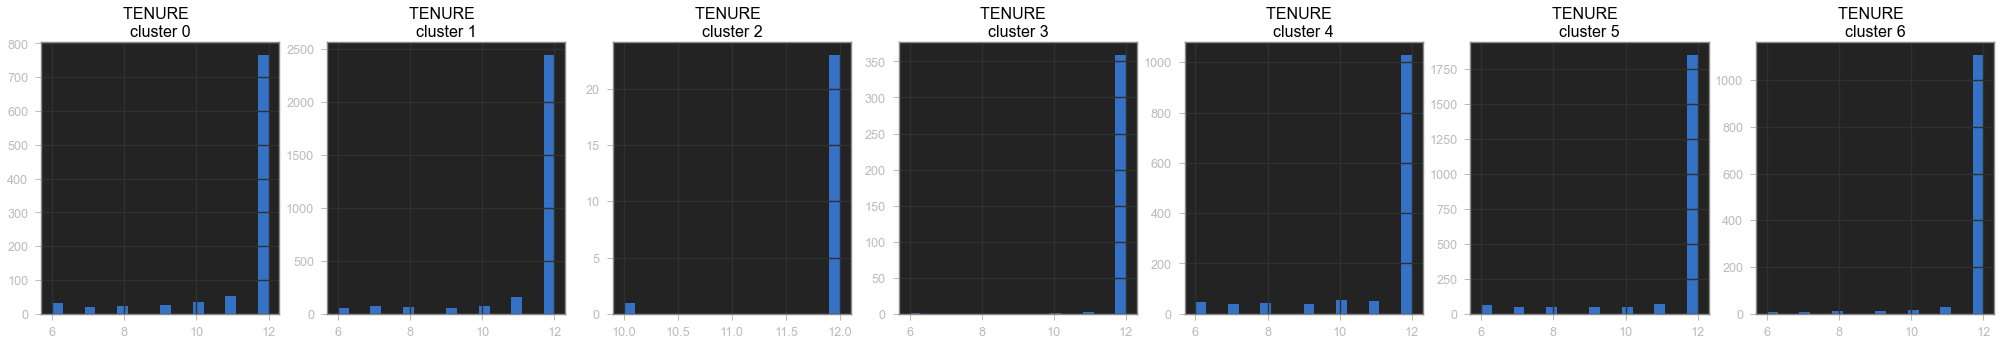

In [42]:
for i in creditcard.columns:
    plt.figure(figsize = (35,5))
    for j in range(7):
        plt.subplot(1,7,j+1)
        cluster = creditcard_cluster[creditcard_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}  \ncluster {}'.format(i,j), color = 'black', fontsize =16)
        
plt.show()

## Principal Component Ananlysis

In [45]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(creditcard_scaled)
principal_comp

array([[-1.68221953, -1.07644919],
       [-1.13828087,  2.50645587],
       [ 0.96968833, -0.38352851],
       ...,
       [-0.9262109 , -1.81077109],
       [-2.33655987, -0.65795147],
       [-0.55642298, -0.40047219]])

In [49]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster' : labels})], axis = 1)
pca_df.head()

,pc1,pc2,cluster
0,-1.682220,-1.076449,1
1,-1.138281,2.506456,0
2,0.969688,-0.383529,6
3,-0.873621,0.043157,1
4,-1.599437,-0.688574,1


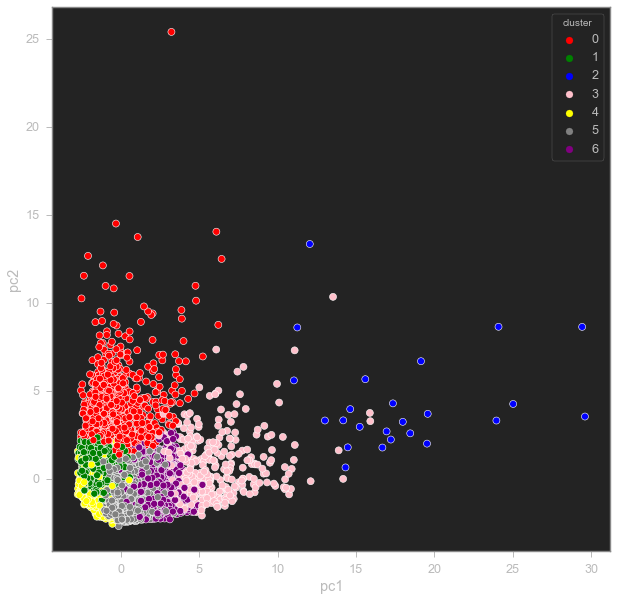

In [50]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x = 'pc1', y = 'pc2', hue = 'cluster', data = pca_df, palette =['red', 'green', 'blue', 'pink', 
                                                                                     'yellow','gray','purple'])
plt.show()